<a href="https://colab.research.google.com/github/LeonardoCechellaVelho/machine-learning/blob/master/pre_processamento_house_price_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste desafio vamos passar por todo o processo de pré-processamento e criação de um modelo de aprendizado de máquina no famoso conjunto de dados “House Price”, que é usado em competições de Machine Learning. Neste dataset você pode encontrar mais 70 atributos sobre casas e seus respectivos preços.

**Objetivo:** É seu trabalho como engenheiro da computação prever o preço de venda de cada casa, ou seja, criar um modelo para isso.

**Itens que você deve cumprir**:

***PARTE 2 ***

*   Utilizar a correlação de person e spearman para detectar as 5 variáveis com maior correlação. 
*   Plotar a matriz de correlação de ambos 
*   Agora com os 5 atributos mais importantes aplicar ao modelo de regressão (dado pelo professor) e verificar a acurácia
*   Utilizar a RFE para detectar as 5 variáveis importantes. 
*   Agora com os 5 atributos mais importantes aplicar ao modelo de regressão (dado pelo professor) e verificar a acurácia
*   Utilizar o seaborn para plotar 2 variáveis 'lineares'
*   Utilizar PCA selecionando 2 atributos e transformar em 1 componente 
*   Aplicar o dataset (agora com PCA) ao modelo de regressão (dado pelo professor) e verificar a acurácia 

**Importando as principais bibliotecas**

In [ ]:
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import seaborn as sns #biblioteca utilizada para construir os gráficos
from sklearn.linear_model import LogisticRegression # biblioteca para regressão logística 
from sklearn.decomposition import PCA #biblioteca para PCA
from sklearn.feature_selection import RFE #biblioteca para aplicação RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression #importa o modelo de regressão linear univariada
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Obtendos os dados utilizano google files**

In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving Dataset_H.csv to Dataset_H.csv


**Ler o arquivo CSV para um data frame** -> utilizar o read_csv

In [ ]:
nome_do_arquivo="Dataset_H.csv" 
dataframe = pd.read_csv(nome_do_arquivo) #carrega o CSV para um dataframe

***Apresentar uma "exemplo" do dataframe (5 instâncias) ***-> Utulizar head()

In [ ]:
dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


***Apresentar as informações sobre as instâncais do dataset, como : N-Entradas, N-Atributos e Tipos ***-> Utilizar o comando info()

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Verificar o somatório de dados Nullos em cada atributo** -> utilizar os camandos isnull e sum

In [ ]:
dataframe.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

**Calcular média para substituir nos valores nulos** ->  Utilizar o comando mean

In [ ]:
dataframe['LotFrontage'].fillna(dataframe['LotFrontage'].mean(),inplace = True)

***Preencher os dados nulos com a média ***-> utilizar o comando fillna

**Verificar o somatório de dados nulos em cada atributo** -> utilizar os camandos isnull e sum

In [ ]:
dataframe.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

***Verificar possíveis outliers -> ***utilizar o boxplot 

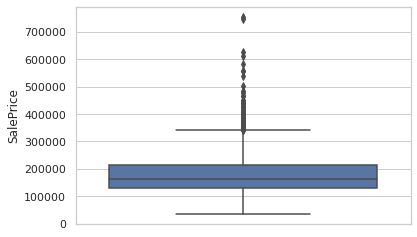

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(y="SalePrice",
                 data=dataframe)

***Analisar as variáveis e definir um método para trasnformar o dado categórico ***-> comando dummies para One Hot Encoding ou labelencoder para OrdinalEncoder

In [ ]:
labelencoder = LabelEncoder()
dataframe['LotConfig_encoded'] = labelencoder.fit_transform(dataframe['LotConfig'])

In [ ]:
one_hot_Street = pd.get_dummies(dataframe['Street'])
dataframe =  dataframe.join(one_hot_Street)

***Escolher 10 variáveis de entrada e a variável preço como saíada***


dica:

df_final = dataframe[['SalePrice','LotFrontage','OverallQual','TotalBsmtSF', '1stFlrSF','2ndFlrSF','GarageCars','GarageArea','YearBuilt','Grvl','Pave','LotConfig_encoded']] 



In [ ]:

df_final = dataframe[['SalePrice','LotFrontage','OverallQual','TotalBsmtSF', '1stFlrSF','2ndFlrSF','GarageCars','GarageArea','YearBuilt','Grvl','Pave','LotConfig_encoded']] 


In [ ]:
 x = df_final.drop('SalePrice',axis=1)

In [ ]:
 y = df_final['SalePrice']

**Aplicar ao modelo de regressão (dado pelo professor) e verificar a acurácia**

In [ ]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
#x_Reshaped=x.reshape((-1, 1)) #coloca os dados no formato 2D
regressao= reg.fit(x,y) # encontra os coeficientes (realiza a regressão)

In [ ]:
#realiza a previsão
previsao=reg.predict(x)

In [ ]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

Y = [ 5.09650792e+01  2.09047235e+04  2.02147156e+01  6.05771492e+01
  4.82639721e+01  9.60071734e+03  1.65757348e+01  2.98373839e+02
 -4.37866738e+03  4.37866738e+03 -4.75870231e+02]X -674591.2119430812


In [ ]:
R_2 = r2_score(y, previsao)  #realiza o cálculo do R2

In [ ]:
print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.7702802058583125


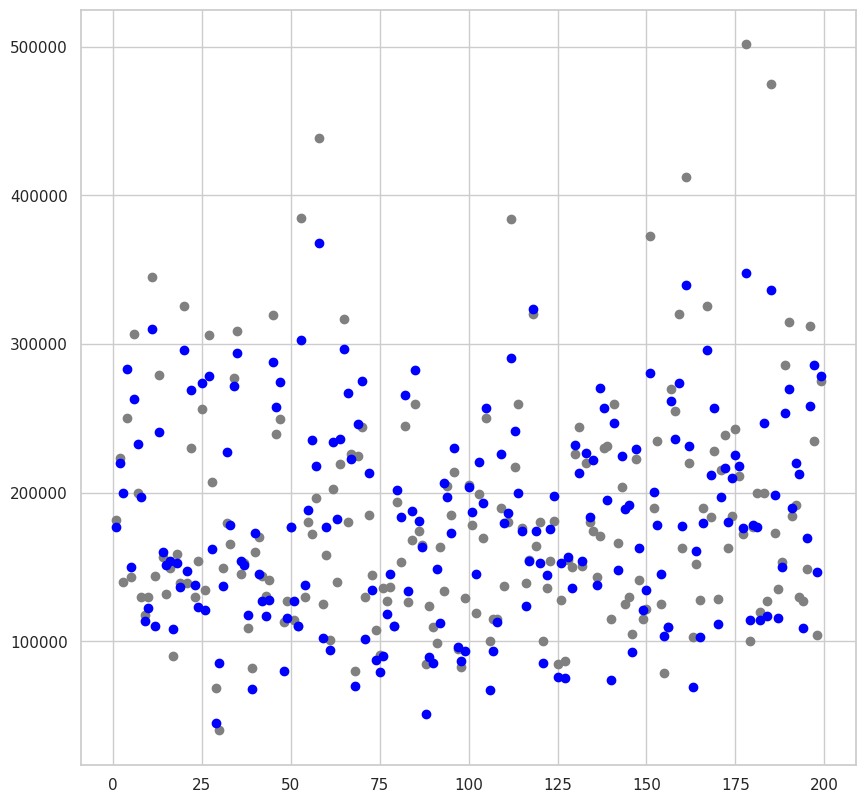

In [ ]:
plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(x.index[1:200], y[1:200],  color='gray') #realiza o plot do gráfico de dispersão
plt.scatter(x.index[1:200], previsao[1:200],  color='blue') #realiza o plot do gráfico de dispersão
plt.show()

**------------------- Início PARTE 2 ---------------**

**Verificar por meio da correlação de Pearson as variáveis mais importantes**

In [ ]:
corr_pearson = x.apply(lambda x : x.corr(y, method='pearson'))

In [ ]:
ind_pearson = np.argsort(corr_pearson)

In [ ]:
print(corr_pearson[ind_pearson])

LotConfig_encoded   -0.067396
Grvl                -0.041036
Pave                 0.041036
2ndFlrSF             0.319334
LotFrontage          0.334901
YearBuilt            0.522897
1stFlrSF             0.605852
TotalBsmtSF          0.613581
GarageArea           0.623431
GarageCars           0.640409
OverallQual          0.790982
dtype: float64


**Verificar por meio da correlação de Spearman as variáveis mais importantes**

In [ ]:
corr_spearman = x.apply(lambda x : x.corr(y, method='spearman'))

In [ ]:
ind_spearman = np.argsort(corr_spearman)

In [ ]:
print(corr_spearman[ind_spearman])

LotConfig_encoded   -0.074225
Grvl                -0.045814
Pave                 0.045814
2ndFlrSF             0.293598
LotFrontage          0.390963
1stFlrSF             0.575408
TotalBsmtSF          0.602725
GarageArea           0.649379
YearBuilt            0.652682
GarageCars           0.690711
OverallQual          0.809829
dtype: float64


**Plotar Gráficos da Correlação**

In [ ]:
mt_corr_pearson = dataframe.corr(method='pearson')

In [ ]:
mt_corr_pearson.style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
mt_corr_spearman = dataframe.corr(method='spearman')

In [ ]:
mt_corr_spearman.style.background_gradient(cmap='coolwarm').set_precision(2)

**Aplicar ao modelo de regressão (dado pelo professor) e verificar a acurácia**

In [ ]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
#x_Reshaped=x.reshape((-1, 1)) #coloca os dados no formato 2D
regressao= reg.fit(x,y) # encontra os coeficientes (realiza a regressão)

In [ ]:
#realiza a previsão
previsao = reg.predict(x)

In [ ]:
R_2 = r2_score(y, previsao)  #realiza o cálculo do R2

In [ ]:
print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.7702802058583125


**Verificar por meio do algoritmo RFE as variáveis mais importantes**

In [ ]:
model_RFE = LinearRegression()

In [ ]:
rfe = RFE(model_RFE,2)

In [ ]:
fit = rfe.fit(x,y)

**Aplicar ao modelo de regressão (dado pelo professor) e verificar a acurácia**

In [ ]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
#x_Reshaped=x.reshape((-1, 1)) #coloca os dados no formato 2D
regressao= reg.fit(x,y) # encontra os coeficientes (realiza a regressão)

In [ ]:
#realiza a previsão
previsao=reg.predict(x)

In [ ]:
R_2 = r2_score(y, previsao)#realiza o cálculo do R2

In [ ]:
print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.7702802058583125


**Plotar um gráfico para 2 variáveis "lineares" para posteiriormente utilizar PCA**

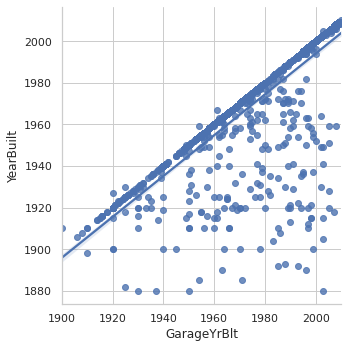

In [ ]:
sns.lmplot(x="GarageYrBlt", y="YearBuilt", data=dataframe)

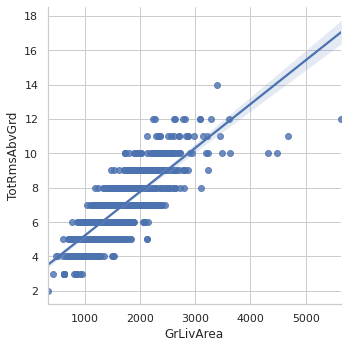

In [ ]:
sns.lmplot(x="GrLivArea", y="TotRmsAbvGrd", data=dataframe)

***Selecionar 2 atributos para transformar em um componente principal e aplicar PCA ***

In [ ]:
pca = PCA(n_components=1)

In [ ]:
pca.fit(dataframe[['GrLivArea', 'TotRmsAbvGrd']])

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
GrLivArea_TotRmsAbvGrd = pca.transform(dataframe[['GrLivArea', 'TotRmsAbvGrd']])

In [ ]:
dataframe['GrLivArea_TotRmsAbvGrd'] = GrLivArea_TotRmsAbvGrd

In [ ]:
dataframe.drop(['GrLivArea', 'TotRmsAbvGrd'], axis=1,inplace=True)

***Aplicar ao modelo de regressão (dado pelo professor) e verificar a acurácia***

In [ ]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
#x_Reshaped=x.reshape((-1, 1)) #coloca os dados no formato 2D
regressao= reg.fit(x,y) # encontra os coeficientes (realiza a regressão)

In [ ]:
#realiza a previsão
previsao=reg.predict(x)

In [ ]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

Y = [ 5.09650792e+01  2.09047235e+04  2.02147156e+01  6.05771492e+01
  4.82639721e+01  9.60071734e+03  1.65757348e+01  2.98373839e+02
 -4.37866738e+03  4.37866738e+03 -4.75870231e+02]X -674591.2119430812


In [ ]:
R_2 = r2_score(y, previsao)  #realiza o cálculo do R2

In [ ]:
print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.7702802058583125
